In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
df = load_iris()

In [4]:
df  = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.isnull().sum()/df.shape[0]*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [6]:
## spliting for independent feature and dependent feature

In [7]:
X = df.drop('species',axis= 1)

In [8]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
Y = df['species']
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2 ,random_state=42)

In [12]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


## Post Prunning Process

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
# here we create the Decision tree then pruning will perform

## First Decision Tree 
### withOut any Pre-define max_deth  

In [15]:
decision_tree = DecisionTreeClassifier()

In [16]:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [17]:
from sklearn import tree

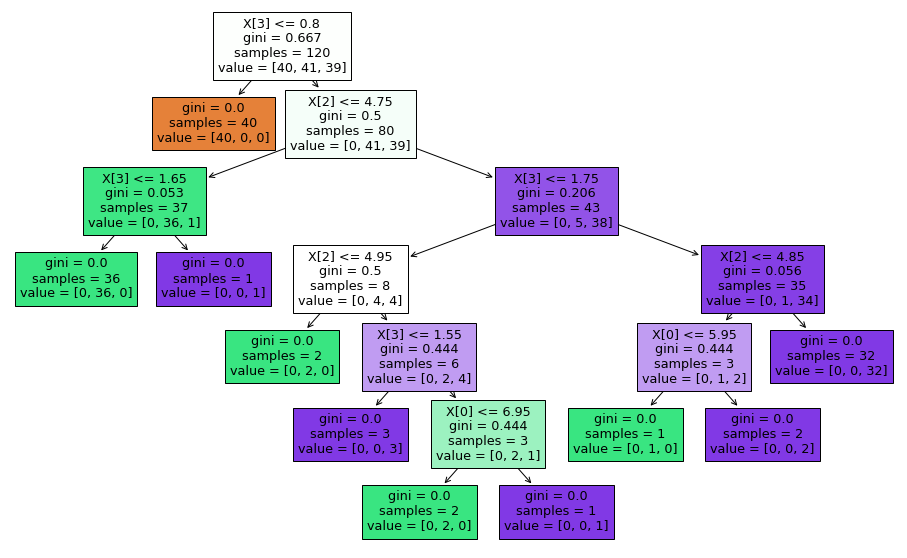

In [18]:
plt.figure(figsize = (16,10))
tree.plot_tree(decision_tree,filled= True)
plt.show()

## Second Decision Tree
### with predifine max_depth = 2 Level

#### Here we considering 2nd level because in seconf level left value [0 ,36,1] 36 is more compare to other s so no need to split
#### And on the right side value if [0 , 5 ,38] in which 38 larger than other two , it means no need to split  more than 2nd level

In [19]:
decision_tree = DecisionTreeClassifier(max_depth = 2)

In [20]:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

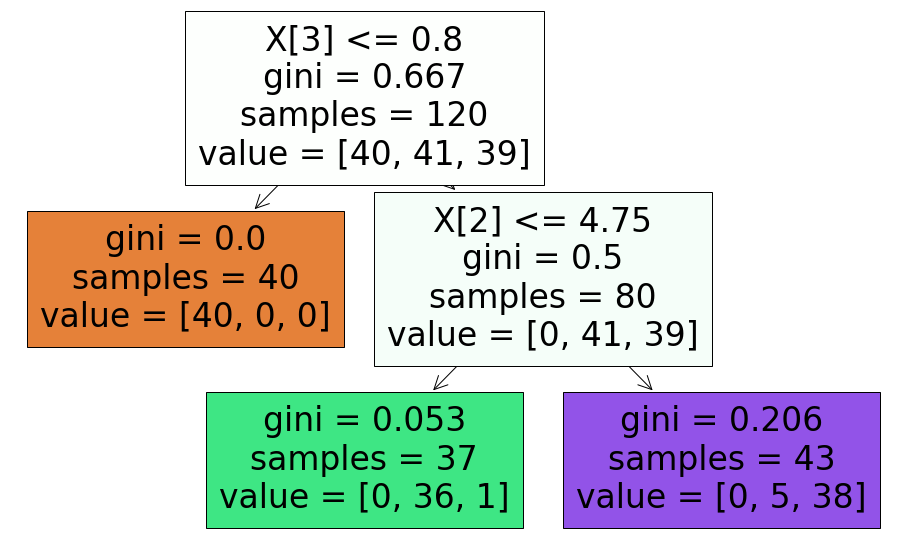

In [21]:
plt.figure(figsize = (16,10))
tree.plot_tree(decision_tree,filled= True)
plt.show()

### NoW we can see only 2nd level is mentioned

### Now we start Our prediction

In [22]:
Y_predict = decision_tree.predict(X_test)

In [23]:
Y_predict

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [24]:
from sklearn.metrics import accuracy_score,classification_report

In [25]:
score =accuracy_score(Y_predict , Y_test)

###  final Accuracy

In [26]:
score

0.9666666666666667

In [27]:
print( classification_report(Y_predict,Y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

